In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import cycle
from sympy import *
from scipy.optimize import fsolve
from scipy.special import lambertw

In [53]:
Ts = 4.2 / 40 # Stall Torque (bare motor) (Nm)
Is = 8.5      # Stall current (A)
If = 0.2      # No Load Current (A)
nf = 150 * 40 # Free Speed (RPM)
Vn = 12       # Nominal Voltage (V)
rb = 0.1      # Internal Battery Resistance (Ohms)
Ie = 0        # External Current Draw (A)

rw = 0.051    # Wheel Radius (m)
m  = 13       # Robot Mass (Kg)
Iw = 0.000    # Rotational Inertia of wheel (kg m^2)
E  = 0.7      # Efficiency of wheels (Mecanum = 0.7, tank = 1)

xfs = np.array([1.5, 2, 3, 0.4]) # Target Distance (m)


# Gear Reductions
reductionMin = 5
reductionMax = 150
reductionDelta = 0.1

In [54]:
c3 = (Ts*Vn - Ts*Ie*rb)/(Vn) - (Ts*rb*Is*(Vn-Ie*rb))/(Vn*(Vn + rb*Is))
c4 = (Ts*Is*rb)/(nf*Vn + nf*Is*rb) - (Ts)/(nf)

In [55]:
def timeForDist (x, g):
    c1 = (E*rw*g*c3) / (rw**2 * m + Iw*E)
    c2 = (E*rw*g*c4*30) / (math.pi*rw*(rw**2 * m + Iw*E))
    
    time = -(LambertW(-exp(-(x*c2**2)/(c1) - 1)) + 1)/(c2) - (x*c2)/(c1)
    return time

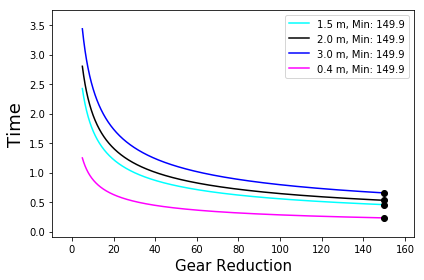

In [56]:
# Fill my array

ratioTests = np.arange(reductionMin, reductionMax, reductionDelta, dtype = np.float64)
data = np.zeros((xfs.size, ratioTests.size))

minimums = np.zeros((2, xfs.size))

i2 = 0
j2 = 0
tempMin = 0
tempRatio = 0

for x in xfs:
    j2 = 0
    tempMin = 0;
    for curRatio in ratioTests:
        # Find new time
        tempTime = timeForDist(x, curRatio)
        data[i2, j2] = tempTime
        
        # Check for min
        if tempTime < tempMin or tempMin == 0:
            tempMin = tempTime
            tempRatio = curRatio
        
        j2 += 1
    
    minimums[0, i2] = tempRatio
    minimums[1, i2] = tempMin
    i2 += 1

# Make the Graphs!

colors = cycle(["aqua", "black", "blue", "fuchsia", "gray", "green", "lime", "maroon", "navy", "olive", "purple", "red", "silver", "teal", "yellow"])

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range (0, xfs.size):
    ax.plot(ratioTests, data[i], label=str(xfs[i]) + " m, Min: " + str(round(minimums[0, i], 3)), color=next(colors))
    
ax.plot(minimums[0], minimums[1], "ko")
    
    
ax.set_xlabel("Gear Reduction", fontsize=15)
ax.set_ylabel("Time", fontsize=18)

ax.legend(loc="best")

ax.margins(0.1)
fig.tight_layout()

plt.show()


In [78]:
def current(n):
    return (Is*Vn - Is*Ie*rb)/(Vn**2 + rb*Is*Vn) - (Is*Vn)/(nf*Vn+nf*Is*rb) * n

In [79]:
current(150*0)

0.66147859922179